In [554]:
%reset -f
%load_ext autoreload
%autoreload 2

import Odin as backend

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [555]:
geom = backend.createGeometry( 'rectangle', [0.5, 0.3] )
mesh = backend.createMesh( geom, res=100 )

# example: incompressible flow but with temp-dep density, i.e. BoussinesqFlow
# mulitphase stokes flow
myFlowModels = {
    #'flowField'     :   backend.FlowModels.IncompressibleFlow(),
    #'soluteTransport':  backend.FlowModels.ScalarConvectionDiffusion(),
    'temperature'   :   backend.FlowModels.ScalarConvectionDiffusion(scalarFieldName='T', velocityFieldName='U', diffusionCoefficientName='k')
    }

# I should be able to see basic properties, but only after initializing
# the simulations instance, the properties will also show default information
# for every boundary etc
myFlowModels['temperature'].showContinuumProperties()

# setting a simulation template
sim1 = backend.Simulation(myFlowModels, mesh, geom )
#print(type(sim1._variableFields['U']).__name__) # i can use this to remove the member variable _type

ScalarConvectionDiffusion:
	 {'diffusionCoefficient': 1.49e-09, 'scalarFieldName': 'T', 'velocityFieldName': 'U'}


variable fields :
	 T 	 variableCellField 	 {'left': 'zeroGradient', 'right': 'zeroGradient', 'top': 100, 'bottom': 50}
parameter fields :
	 U 	 parameterFaceField
	 k 	 scalar




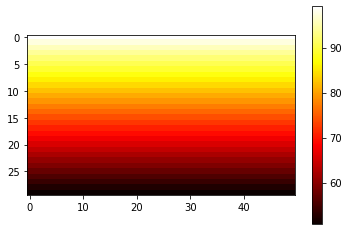

executing


In [556]:
# changing boundary conditions
myFields = sim1.getFields()
T = myFields['T']
T.setBoundaryCondition('top', 100)
T.setBoundaryCondition('bottom', 50)
T.setBoundaryCondition('left', 'zeroGradient')
T.setBoundaryCondition('right', 'zeroGradient')

sim1.showfields()

# all fields and equation systems should be generated here
sim1.compile()

T.solve()

sim1.display(T)


executionParameters = {
    'startTime':0,
    'convergenceCriterium':9
}

# this should be generated by simulation instance
solutionAlgorithm = {
    'e.g. SIMPLE':1
}

sim1.execute()




modules = {
    'mesh' : None,
    'fields' : {},
    'flowModels' : {}
}

modules['mesh'] = {
    'type' : '2DCartesian',
    'length_x' : 0.5,
    'length_y' : 0.3,
    'resolution' : 100
}

# everything is a field
# availibe fields: vectorfield, scalarField (both as variable or parameter fields), const,
# adding fields:
modules['fields']['T'] = {
    'type' : 'scalarField', # if this a cell of a face fields (or a vertex field) should be decided low level
    'modifier' : 'iterative', # call it 'dependent' or 'algebraic dependent'?
    'initialValue' : 0
}

modules['fields']['C'] = {
    'type' : 'scalarField',
    'modifier' : 'iterative',
    'initialValue' : 0.1
}

modules['fields']['rho'] = {
    'type' : 'scalarField',
    'modifier' : 'algebraic',
    'initialValue' : 1
}

modules['fields']['diffusionCoeff_T'] = {
    'type' : 'constant',
    'initialValue' : 10
}

# defining partial diffential equaitons on some flields
modules['flowModels']['T'] = {
    'type' : 'scalarDiffusion'  # this should be a PDE
    
}

modules['flowModels']['C'] = {
    'type' : 'scalarDiffusion'  # this should be a PDE
}

In [557]:
#sim = myCFD.simulation(modules)

#sim.solve('T')
#sim.solve('C')

#sim.display('C')
#sim.execute()

